In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"windaayumelati","key":"03748c9e298dbec2b99f164a2b651ba9"}'}

**Make directory and change permission**


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d elmoallistair/commodity-prices-19602021

  0% 0.00/5.25k [00:00<?, ?B/s]
100% 5.25k/5.25k [00:00<00:00, 5.97MB/s]


In [4]:
!mkdir commodity-prices-19602021
!unzip commodity-prices-19602021
!ls commodity-prices-19602021

Archive:  commodity-prices-19602021.zip
  inflating: commodity_prices.csv    


**Deskripsi Library yang digunakan**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Memanggil Dataset**

In [6]:
df = pd.read_csv('commodity_prices.csv')

**Deskripsi Dataset**








In [7]:
df.head()

,Year,Cocoa,Coffee,Tea,Crude Oil,Coal,Natural Gas,Banana,Sugar,Orange,...,Silver,Cotton,Rubber,Tobacco,Coconut Oil,Groundnut Oil,Palm Oil,Soybean,Logs,Sawnwood
0,1960,0.59,0.92,1.03,1.63,NaN,0.14,0.14,0.07,0.13,...,0.91,0.65,0.78,1736.87,312.33,327.00,224.42,223.92,31.94,149.17
1,1961,0.48,0.90,0.95,1.57,NaN,0.15,0.13,0.06,0.13,...,0.92,0.67,0.60,1563.19,253.42,330.25,228.42,287.33,33.06,151.98
2,1962,0.46,0.83,0.97,1.52,NaN,0.16,0.13,0.06,0.11,...,1.08,0.65,0.56,1404.90,251.22,274.34,216.24,227.00,36.39,160.06
3,1963,0.55,0.81,0.95,1.50,NaN,0.16,0.14,0.18,0.09,...,1.28,0.65,0.52,1343.61,286.33,268.50,222.39,223.58,35.49,157.85
4,1964,0.51,1.01,0.93,1.45,NaN,0.15,0.17,0.13,0.08,...,1.29,0.65,0.49,1488.30,296.48,315.38,239.45,233.00,30.26,144.83


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           62 non-null     int64  
 1   Cocoa          62 non-null     float64
 2   Coffee         62 non-null     float64
 3   Tea            62 non-null     float64
 4   Crude Oil      62 non-null     float64
 5   Coal           52 non-null     float64
 6   Natural Gas    62 non-null     float64
 7   Banana         62 non-null     float64
 8   Sugar          62 non-null     float64
 9   Orange         62 non-null     float64
 10  Barley         61 non-null     float64
 11  Maize          62 non-null     float64
 12  Sorghum        61 non-null     float64
 13  Rice           62 non-null     float64
 14  Wheat          62 non-null     float64
 15  Beef           62 non-null     float64
 16  Chicken        62 non-null     float64
 17  Lamb           51 non-null     float64
 18  Shrimps     

In [9]:
df = df.drop(['Crude Oil', 'Coal', 'Natural Gas', 'Banana','Orange', 'Barley', 'Maize', 'Sorghum', 'Wheat', 'Chicken', 'Lamb', 'Shrimps','Platinum', 'Silver', 'Cotton', 'Rubber', 'Tobacco', 'Groundnut Oil', 'Palm Oil', 'Soybean', 'Logs', 'Sawnwood'], axis=1)

In [10]:
df.head()

,Year,Cocoa,Coffee,Tea,Sugar,Rice,Beef,Gold,Coconut Oil
0,1960,0.59,0.92,1.03,0.07,107.35,0.74,35.27,312.33
1,1961,0.48,0.90,0.95,0.06,118.95,0.68,35.25,253.42
2,1962,0.46,0.83,0.97,0.06,134.93,0.71,35.23,251.22
3,1963,0.55,0.81,0.95,0.18,125.66,0.67,35.09,286.33
4,1964,0.51,1.01,0.93,0.13,120.15,0.84,35.10,296.48


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         62 non-null     int64  
 1   Cocoa        62 non-null     float64
 2   Coffee       62 non-null     float64
 3   Tea          62 non-null     float64
 4   Sugar        62 non-null     float64
 5   Rice         62 non-null     float64
 6   Beef         62 non-null     float64
 7   Gold         62 non-null     float64
 8   Coconut Oil  62 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.5 KB


<Axes: >

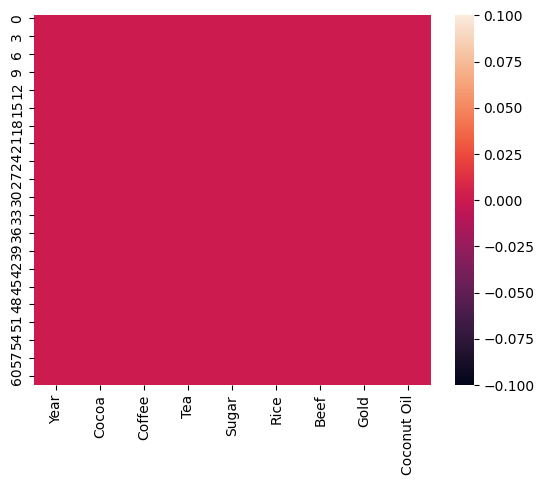

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,Year,Cocoa,Coffee,Tea,Sugar,Rice,Beef,Gold,Coconut Oil
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,1.719677,2.527097,1.752581,0.237097,296.025323,2.413548,510.236613,674.460806
std,18.041619,0.870195,1.243963,0.692082,0.141078,133.045527,1.183344,499.376535,370.276577
min,1960.000000,0.370000,0.810000,0.730000,0.040000,107.350000,0.670000,34.950000,234.060000
25%,1975.250000,1.105000,1.380000,1.152500,0.150000,193.135000,1.580000,150.602500,397.702500
50%,1990.500000,1.605000,2.705000,1.655000,0.210000,274.975000,2.300000,362.845000,584.170000
75%,2005.750000,2.362500,3.317500,2.090000,0.287500,393.627500,2.730000,606.980000,877.055000
max,2021.000000,3.790000,5.980000,3.150000,0.650000,650.190000,5.390000,1799.630000,1730.080000


**Visualisasi Data**

<Axes: >

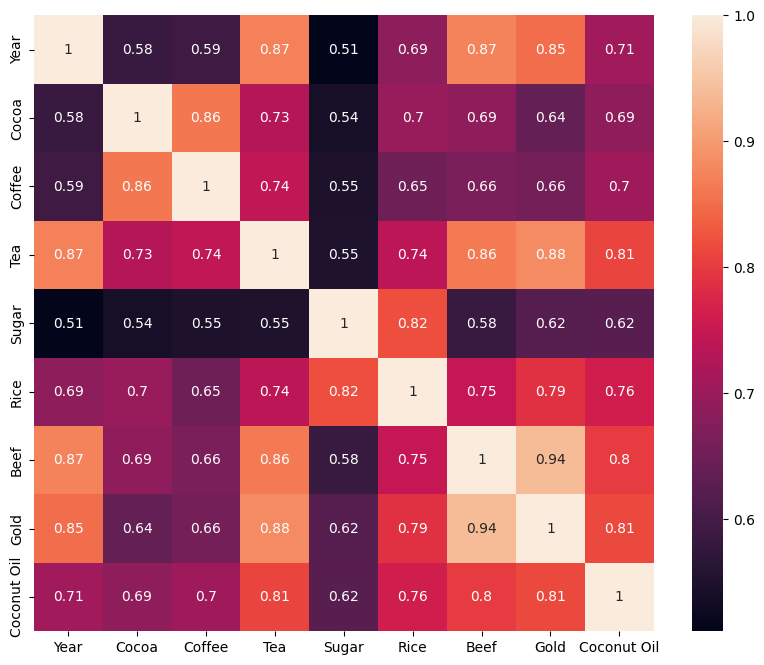

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

**Harga Kopi berdasarkan Tahun**

In [15]:
models = df.groupby('Coffee').count()[['Year']].sort_values(by='Year',ascending=True).reset_index()
models = models.rename(columns={'Year':'NoOfProduct'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, '0.81'),
  Text(1, 0, '0.83'),
  Text(2, 0, '0.86'),
  Text(3, 0, '0.87'),
  Text(4, 0, '0.88'),
  Text(5, 0, '0.9'),
  Text(6, 0, '0.92'),
  Text(7, 0, '0.93'),
  Text(8, 0, '0.99'),
  Text(9, 0, '1.0'),
  Text(10, 0, '1.01'),
  Text(11, 0, '1.11'),
  Text(12, 0, '1.15'),
  Text(13, 0, '1.36'),
  Text(14, 0, '1.37'),
  Text(15, 0, '1.41'),
  Text(16, 0, '1.42'),
  Text(17, 0, '1.44'),
  Text(18, 0, '1.45'),
  Text(19, 0, '1.56'),
  Text(20, 0, '1.77'),
  Text(21, 0, '1.87'),
  Text(22, 0, '1.92'),
  Text(23, 0, '1.97'),
  Text(24, 0, '2.29'),
  Text(25, 0, '2.39'),
  Text(26, 0, '2.5'),
  Text(27, 0, '2.52'),
  Text(28, 0, '2.53'),
  Text(29, 0, '2.69'),
  Text(30, 0, '2.72'),
  Text(31, 0, '2.87'),
  Text(

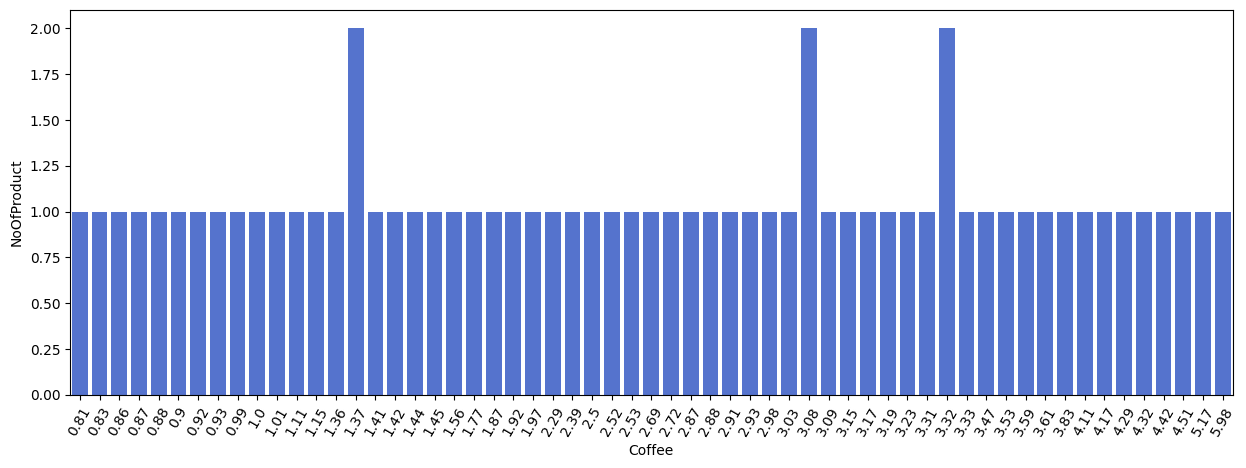

In [16]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Coffee'], y=models['NoOfProduct'], color='royalblue')
plt.xticks(rotation=60)

**Informasi Mengenai Harga Teh**

In [17]:
Tea = df.groupby('Tea').count()[['Year']].sort_values(by='Year',ascending=True).reset_index()
Tea = Tea.rename(columns={'Year':'count'})

<Axes: xlabel='Tea', ylabel='count'>

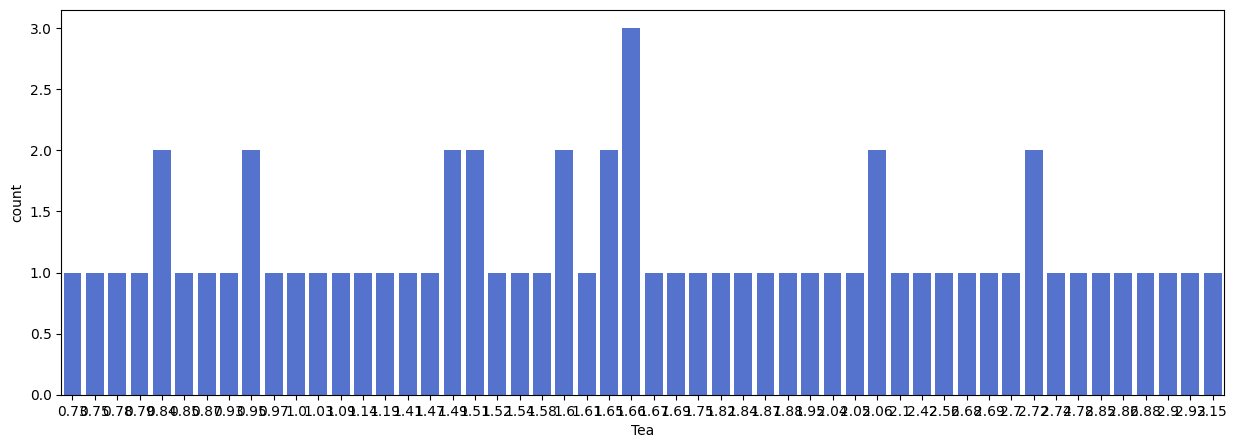

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=Tea['Tea'], y=Tea['count'], color='royalblue')

**Distribusi Harga Kopi**

<ipython-input-19-2e946717fd80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Coffee'])


<Axes: xlabel='Coffee', ylabel='Density'>

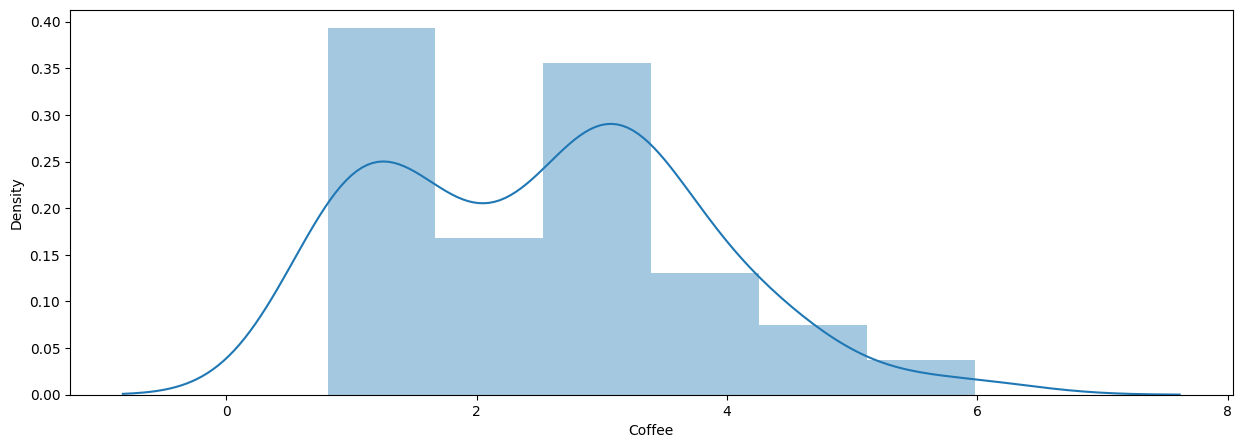

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['Coffee'])

**Distribusi Harga Teh**

<ipython-input-20-6ad7d0a63fec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tea'])


<Axes: xlabel='Tea', ylabel='Density'>

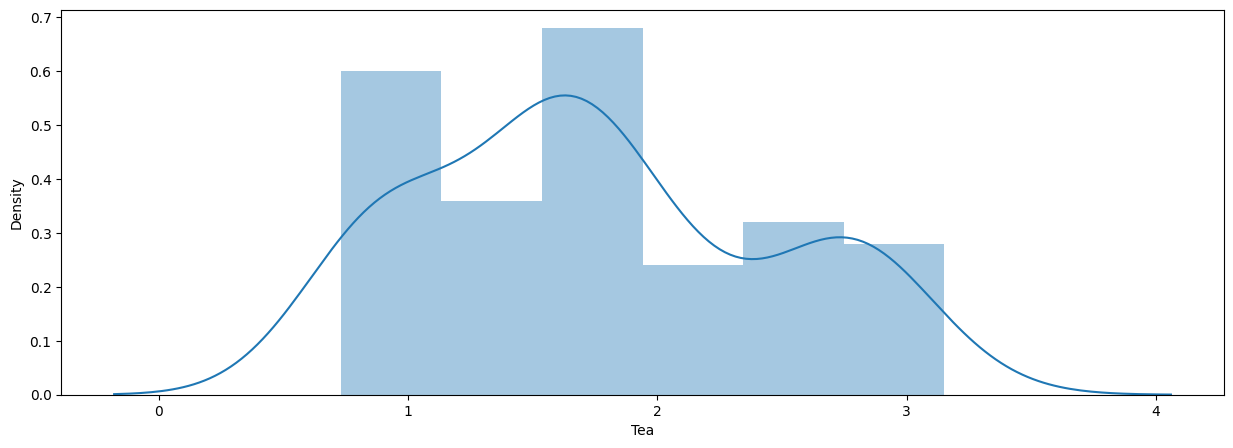

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['Tea'])

**Seleksi Fitur**

In [21]:
features = ['Cocoa', 'Coffee', 'Tea', 'Rice', 'Beef', 'Sugar', 'Coconut Oil','Gold']
x = df[features]
y= df['Year']
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (62, 8)
Shape of y: (62,)


**Split data Training dan data testing**


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=70)
y_test.shape

(16,)

**Membuat Model Regresi Linier**

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

**Akurasi Estimasi**

In [24]:
score = lr.score(x_test, y_test)
print('akurasi model linear =', score)

akurasi model linear = 0.8508395794807775


**Membuat Inputan Model Regresi Linear**

In [25]:
#Cocoa = 1.27, Coffee = 1.97, Tea = 2,06, Rice = 107.35, Beef = 0.74, Sugar = 0.07, Coconut Oil = 312.33, Gold = 35.27
input_data = np.array([[1.27, 1.97, 2.06, 107.35, 0.74, 0.07, 312.33, 35.27]])
prediction = lr.predict(input_data)
print('Estimasi Tahun:', int(prediction[0]))


Estimasi Tahun: 1982


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Metrik evaluasi yang digunakan adalah  R-squared (R²)**

In [28]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Data fitur (harga komoditas) dan tahun
features = ['Cocoa', 'Coffee', 'Tea', 'Rice', 'Beef', 'Sugar', 'Coconut Oil','Gold']
X = df[features]
y = df['Year']

# Membuat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Melakukan prediksi tahun berdasarkan harga komoditas
predicted_years = model.predict(X)

# Menghitung R-squared (R²)
r_squared = r2_score(y, predicted_years)

# Menampilkan hasil
print("R-squared (R²):", r_squared)

R-squared (R²): 0.8375032561246034


**Save Model**

In [27]:
import pickle

filename ='commodity_prices.sav'
pickle.dump(lr, open(filename, 'wb'))